# Blog 08: Hypertension Risk Predictor using SHAP + Random Forest

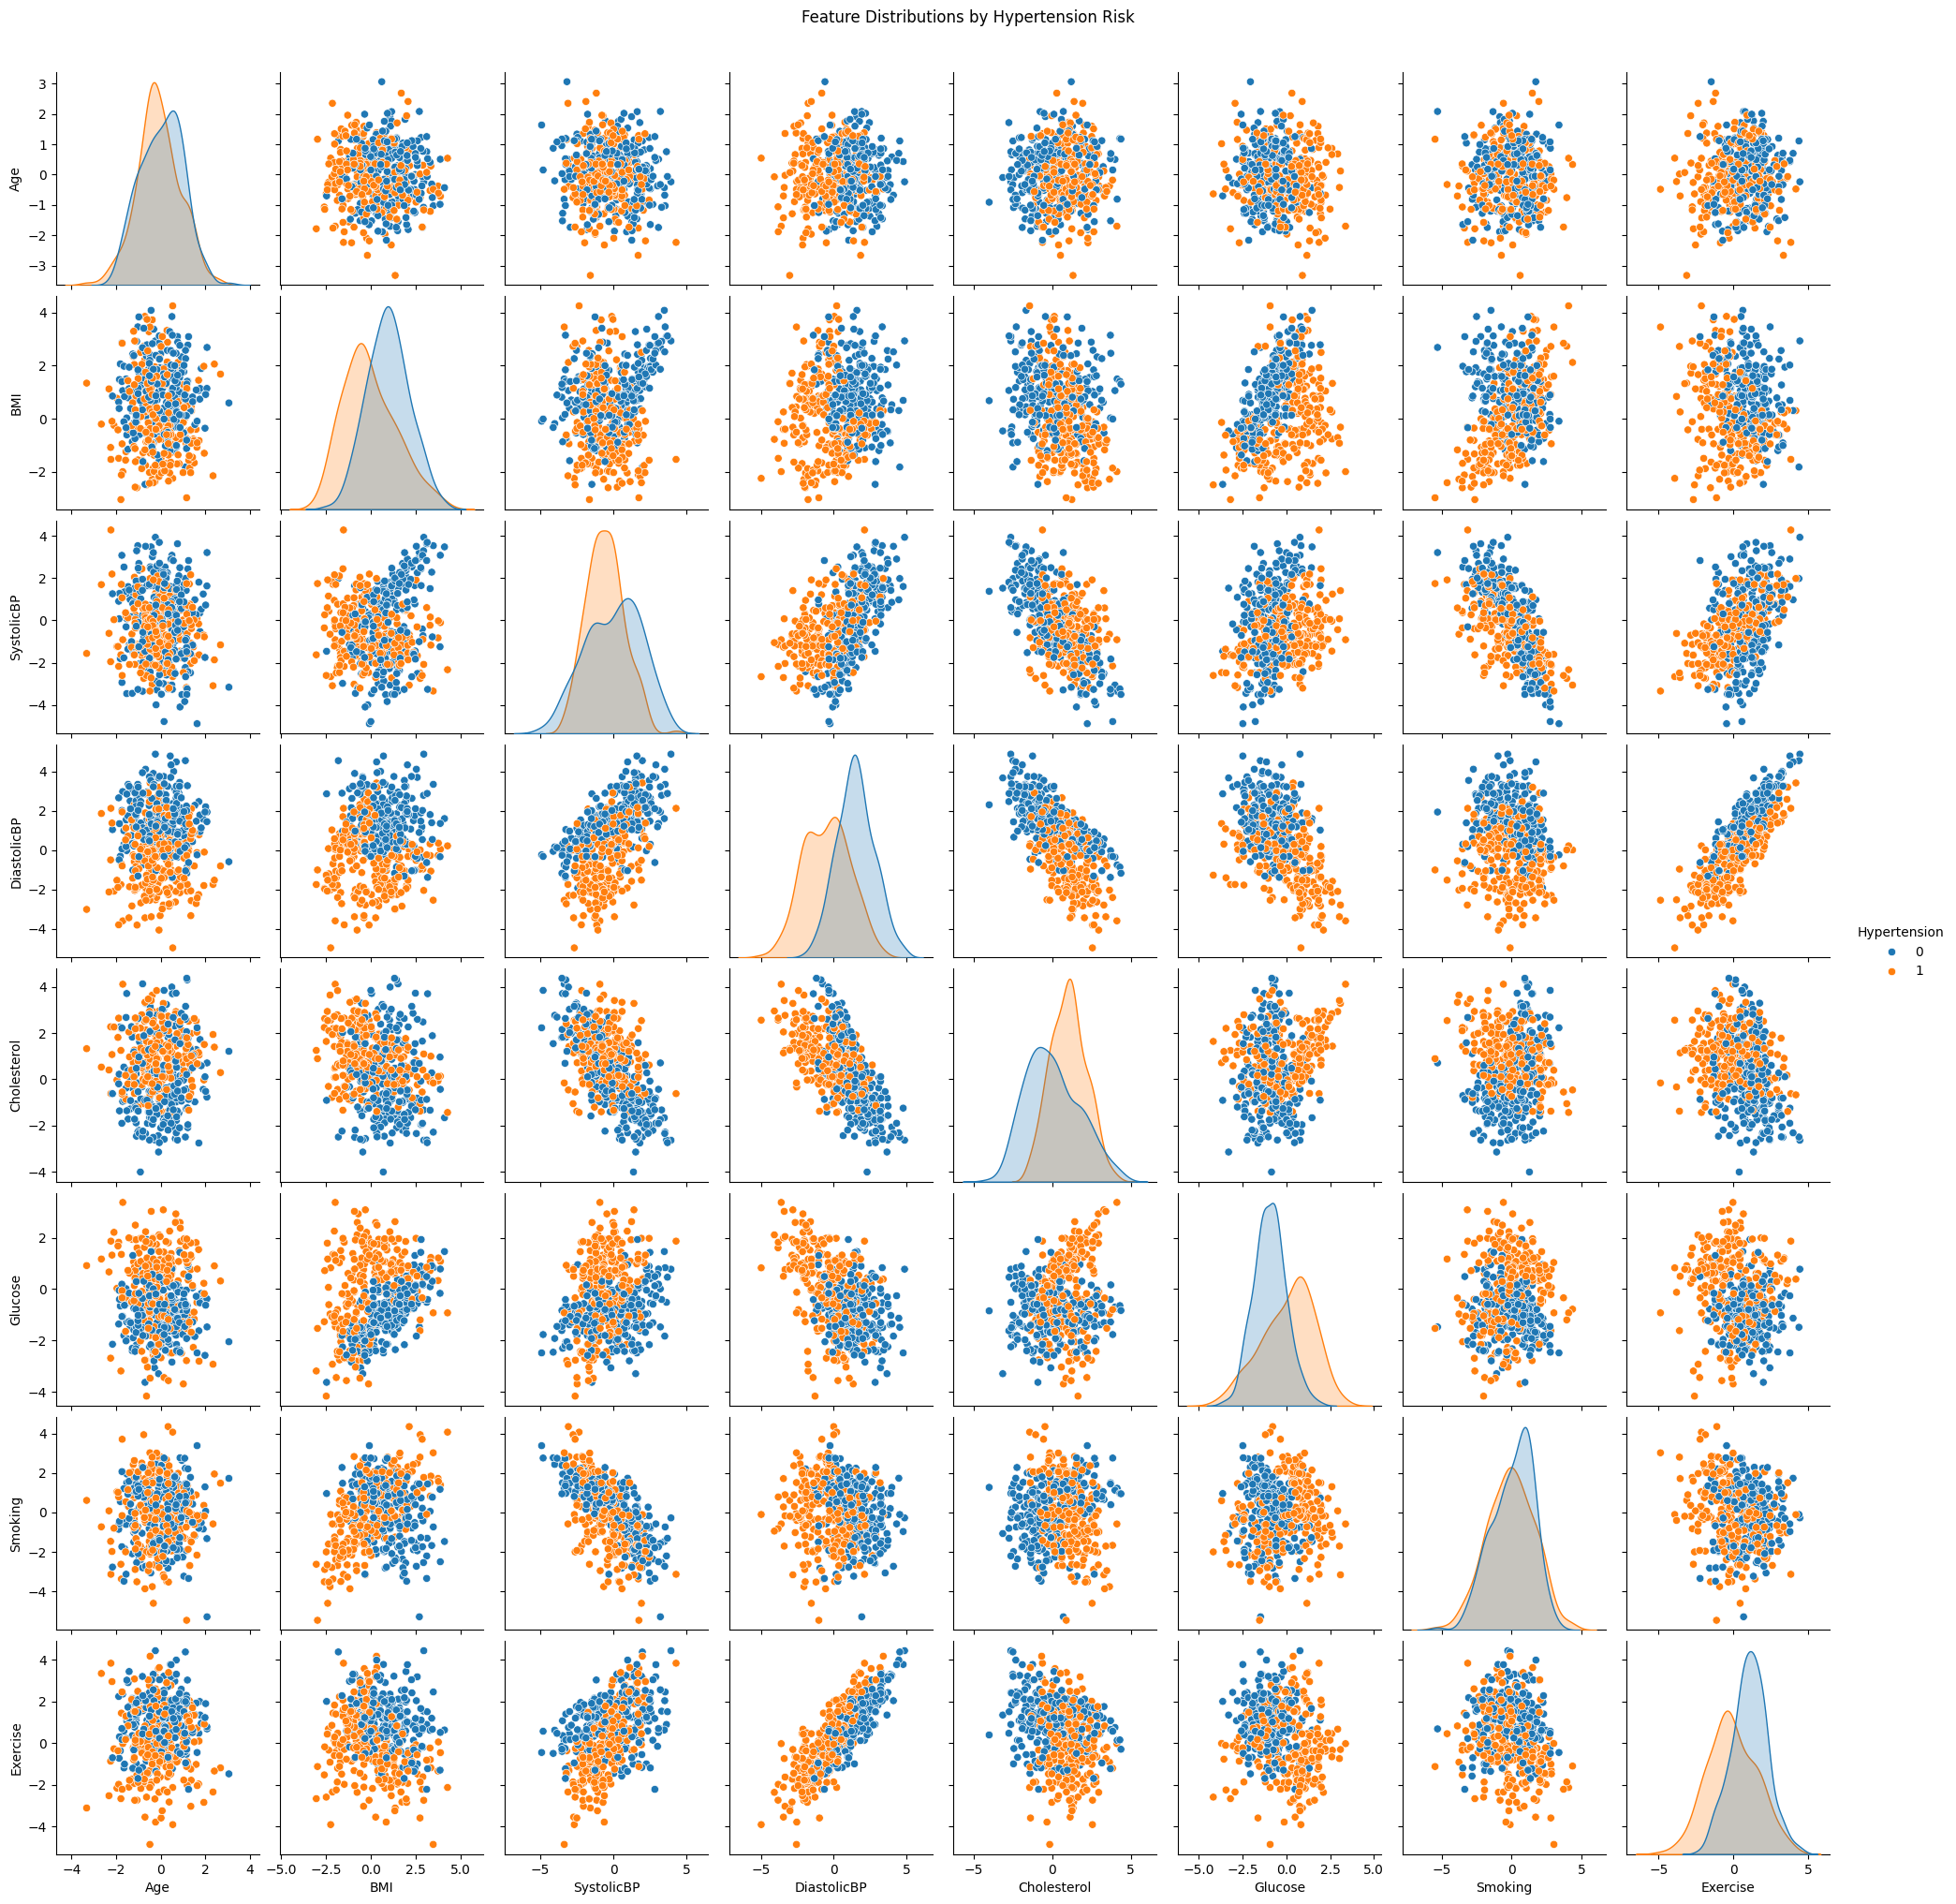

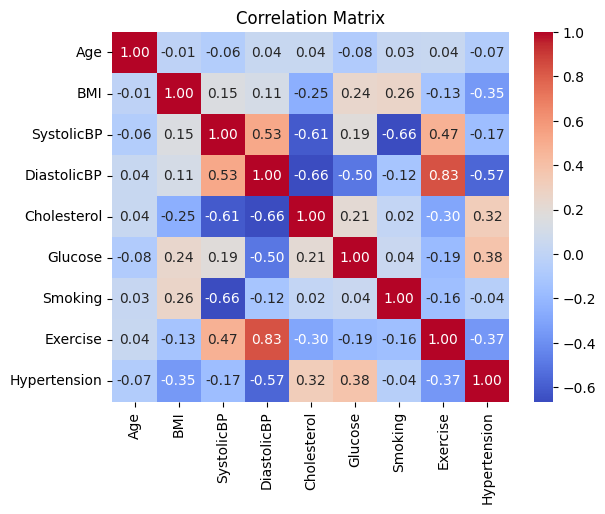

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        56
           1       0.89      0.93      0.91        44

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



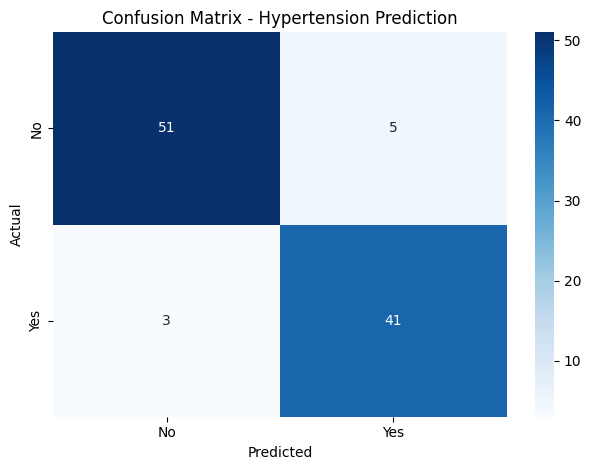

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [ ]:

# Hypertension Risk Predictor using AI: A SHAP-Driven Approach

## 1. Imports and Dataset Load
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import shap

# Load dataset (you can replace with local or Kaggle source)
# Simulated sample dataset for demo purposes
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=8, n_informative=5, n_redundant=2, random_state=42)
columns = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'Cholesterol', 'Glucose', 'Smoking', 'Exercise']
df = pd.DataFrame(X, columns=columns)
df['Hypertension'] = y

df.head()

## 2. Exploratory Data Analysis
sns.pairplot(df, hue='Hypertension')
plt.suptitle('Feature Distributions by Hypertension Risk', y=1.02)
plt.show()

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## 3. Train/Test Split
X = df.drop('Hypertension', axis=1)
y = df['Hypertension']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Train Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix - Hypertension Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## 5. SHAP Explainability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# Force plot for a specific instance
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1][0], X_test.iloc[0])
